# Smucisca

## Projekt pri predmetu Programiranje 1

#### Zajeti podatki:

❄︎ datum in ura   
❄︎ ime smučišča  
❄︎ vreme  
❄︎ temperatura  
❄︎ količina snega (v cm)  
❄︎ odpiralni čas smučišča in zapiralni čas smučišča (v stolpcu obratovanje v obliki parov (odpiralni čas, zapiralni čas)   ter  v stolpcu odprto, ki pove koliko ur je bilo odprto smucisce)  
❄︎ delovanje gondol/sedežnic/vlečnic/parkov (v stolpcu sedeznice v obliki seznama in v stolpcu proge, ki pove koliko procentov vseh prog je bilo odprtih)

Podatki so bili zajeti na strani [snezni telefon](http://snezni-telefon.si) .

#### Predvidena analiza:

❄︎ kakšne so povezave temperature, količine snega, obratovalnim časom ter odprtostjo prog na posameznih smučiščih?  
❄︎ v katerem obdobju je bilo na Slovenskih smučiščih največ snega?  
❄︎ koliko je količina snega odvisna od temperature in vremena?  
❄︎ koliko je od količine snega/ temperature/ vremena odvisen obratovalni čas smučišča?  
❄︎ katero smučišče ima največji povprečen obratovalni čas? Katero smučišče 

### Analiza podatkov slovenskih smučišč je razdeljena na tri večje skope:

❄︎ analiza podatov po posameznih smučiščih  
❄︎ primerjava med smučišči  
❄︎ ostale primerjave (odvisnost količine snega od temperature, vremena, koliko sta temperatura in vreme povezana)

In [517]:
%matplotlib inline

import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') #naredi lepše grafe
plt.rcParams['figure.figsize'] = (15, 5)

Pripravi skupno datoteko:

In [746]:
Skupna=pd.read_csv('projekt-programiranje1/csv_datoteke/skupna.csv', parse_dates=['cas'],index_col='cas')

Pripravimo tabele po posameznih smučiščih

In [747]:
Bukovnik =Skupna[Skupna.smucisce=='Bukovnik']
Celjska_koča=Skupna[Skupna.smucisce=='Celjska_koča']
GTC_Kope =Skupna[Skupna.smucisce=='GTC_Kope']
Javornik =Skupna[Skupna.smucisce=='Javornik']
Macesnovc_Rateče =Skupna[Skupna.smucisce=='Macesnov_Rateče']
Mariborsko_Pohorje =Skupna[Skupna.smucisce=='Mariborsko_Pohorje']
Poseka =Skupna[Skupna.smucisce=='Poseka']
Ribnica_na_Pohorju =Skupna[Skupna.smucisce=='Ribnica_na_Pohorju']
Ribniška_koča =Skupna[Skupna.smucisce=='Ribniška_koča']
Rogla =Skupna[Skupna.smucisce=='Rogla']
RTC_Golte =Skupna[Skupna.smucisce=='RTC_Golte']
RTC_Kranjska_Gora =Skupna[Skupna.smucisce=='RTC_Kranjska_Gora']
RTC_Krvavec =Skupna[Skupna.smucisce=='RTC_Krvavec']
SC_Cerkno =Skupna[Skupna.smucisce=='SC_Cerkno']
ŠC_Rudno =Skupna[Skupna.smucisce=='ŠC_Rudno']
Šentjošt =Skupna[Skupna.smucisce=='Šentjošt']
SKI_Bor_Črni_vrh =Skupna[Skupna.smucisce=='SKI_Bor_Črni_vrh']
Soriška_planina =Skupna[Skupna.smucisce=='Soriška_planina']
STC_Stari_vrh =Skupna[Skupna.smucisce=='STC_Stari_vrh']
Straža_Bled =Skupna[Skupna.smucisce=='Straža_Bled']
Trije_Kralji =Skupna[Skupna.smucisce=='Trije_Kralji']
Žičnice_Vogel =Skupna[Skupna.smucisce=='Žičnice_Vogel']
Mariborsko_Pohorje=Skupna[Skupna.smucisce=='Mariborsko_Pohorje']

Tabele po posameznih smučiščih izgledajo tako:

In [748]:
Rogla[441:450]

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-03-01 23:00:00,Rogla,2016-03-01,"oblačno, rahlo sneži, vetrovno",-1,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 00:00:00,Rogla,2016-03-02,"oblačno, rahlo sneži, vetrovno",-1,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 06:00:00,Rogla,2016-03-02,pretežno jasno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 07:00:00,Rogla,2016-03-02,pretežno jasno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 08:00:00,Rogla,2016-03-02,sončno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 09:00:00,Rogla,2016-03-02,sončno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 10:00:00,Rogla,2016-03-02,sončno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 11:00:00,Rogla,2016-03-02,sončno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-03-02 12:00:00,Rogla,2016-03-02,sončno,-4,100,"{('8.30', '16.00')}",7.5,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67


# 1. Analiza po posameznih smučiščih

Na začetku bomo navedli dva primera slovenskih smučišč (enega bolj 'zanimivega' in enega malo manj).
Poskušali bomo najti kakšno povezavo med temperaturo, količino snega, obratovalnim časom in številom odprtih prog.

## 1.1. Bukovnik

V tabeli Bukovnik so shranjeni podatki o tem smučišču v obliki:

In [749]:
Bukovnik.head()

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-01-25 21:00:00,Bukovnik,2016-01-25,oblačno,-2,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-26 09:00:00,Bukovnik,2016-01-26,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-26 15:00:00,Bukovnik,2016-01-26,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-27 09:00:00,Bukovnik,2016-01-27,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100
2016-01-27 12:00:00,Bukovnik,2016-01-27,sončno,-3,50,"{('16.00', '20.00')}",4,{'vlečnica': '1/1'},100


Primer ene ure:

In [750]:
Bukovnik.iloc[0]

smucisce                   Bukovnik
datum                    2016-01-25
vreme                       oblačno
temperatura                      -2
sneg                             50
obratovanje    {('16.00', '20.00')}
odprto                            4
sedeznice       {'vlečnica': '1/1'}
proge                           100
Name: 2016-01-25 21:00:00, dtype: object

### 1.1.1. povprečne vrednosti po dnevih

In [751]:
Bukovnik.groupby('datum').mean().head()

,temperatura,sneg,odprto,proge
datum,,,,
2016-01-25,-2,50,4,100
2016-01-26,-3,50,4,100
2016-01-27,-3,50,4,100
2016-01-28,-2,50,4,100
2016-01-29,-2,50,4,100


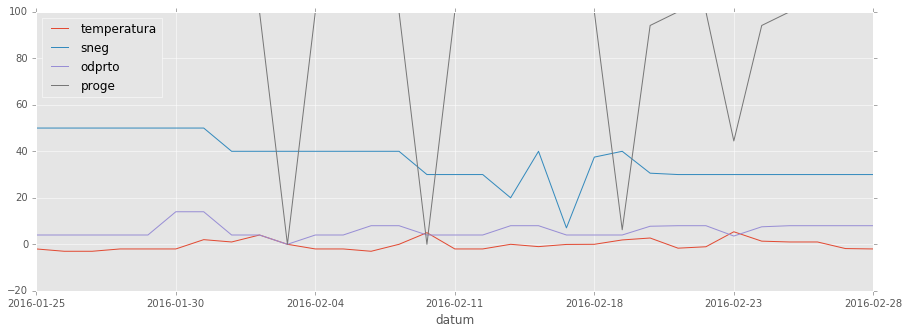

In [752]:
Bukovnik.groupby('datum').mean().plot()

### 1.1.2. tempretatura

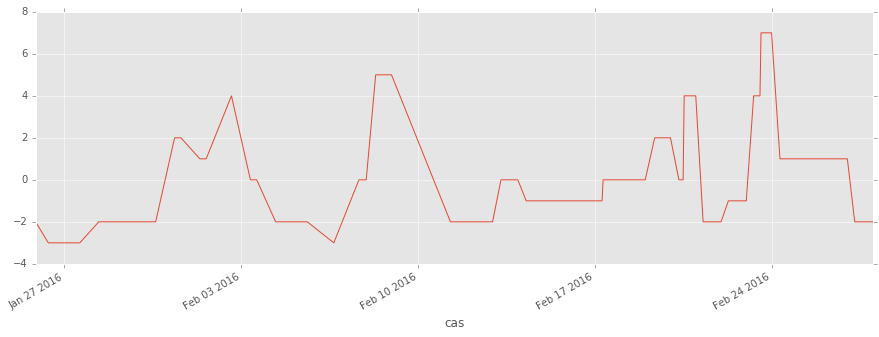

In [753]:
Bukovnik['temperatura'].plot()

maksimalna temperatura v opazovalnem obdobju:

In [754]:
Bukovnik['temperatura'].max()

7

minimalna temperatura v opazovalnem obdobju:

In [755]:
Bukovnik['temperatura'].min()

-3

### 1.1.3. količina snega (v cm)

maksimalna količina snega v opazovalnem obdobju:

In [756]:
Bukovnik['sneg'].max()

50

minimalna količina snega v opazovalnem obdobju:

In [757]:
Bukovnik['sneg'].min()

5

### 1.1.4. obratovalni čas smučišča v urah 

maksimalen obratovalni čas v opazovalnem obdobju:

In [758]:
Bukovnik['odprto'].max()

14.0

minimalen obratovalni čas v opazovalnem obdobju:

In [759]:
Bukovnik['odprto'].min()

0.0

### 1.1.5.  Primerjava

In [760]:
Bukovnik[['temperatura', 'sneg', 'odprto', 'proge']].head(10)

,temperatura,sneg,odprto,proge
cas,,,,
2016-01-25 21:00:00,-2,50,4,100
2016-01-26 09:00:00,-3,50,4,100
2016-01-26 15:00:00,-3,50,4,100
2016-01-27 09:00:00,-3,50,4,100
2016-01-27 12:00:00,-3,50,4,100
2016-01-27 15:00:00,-3,50,4,100
2016-01-28 09:00:00,-2,50,4,100
2016-01-28 12:00:00,-2,50,4,100
2016-01-28 15:00:00,-2,50,4,100


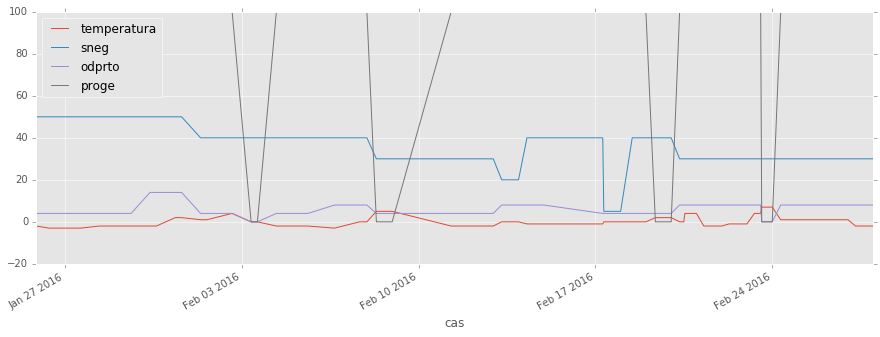

In [761]:
Bukovnik[['temperatura', 'sneg', 'odprto', 'proge']].plot()

### 1.1.6 Vreme

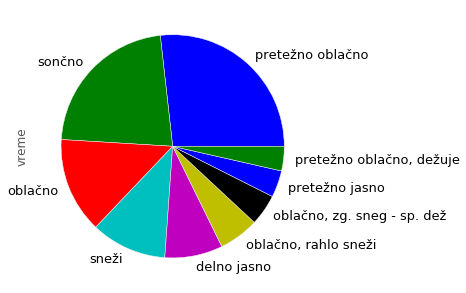

In [762]:
Bukovnik['vreme'].value_counts().head(16).plot(kind='pie', figsize=(5, 5), fontsize=13)

Iz tega primera je težko sklepati na kakršnokoli povezavo med temperaturo, količino snega, obratovalnim časom ter odprtostjo prog. Poskusimo še z Mariborskim Pohorjem.

## 1.2. Mariborsko Pohorje 

Že iz tabele je razvidno, da so se razmere na Mariborskem Pohurju bolj spreminjale kot na smučišču Bukovnik (različna dolžina dolžina obratovalnega časa, različno število odprtih prog), zato je to Smučišče bolj zanimivo za analizo.

In [763]:
MariborskoPohorje.head(19)

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-01-25 21:00:00,MariborskoPohorje,2016-01-25,pretežno jasno,2,45,"{('9.00', '16.00')}",7,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-26 09:00:00,MariborskoPohorje,2016-01-26,pretežno jasno,5,45,"{('9.00', '16.00')}",7,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-26 15:00:00,MariborskoPohorje,2016-01-26,pretežno jasno,5,45,"{('9.00', '16.00')}",7,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-27 09:00:00,MariborskoPohorje,2016-01-27,pretežno jasno,6,45,"{('9.00', '16.00')}",7,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-27 12:00:00,MariborskoPohorje,2016-01-27,pretežno jasno,6,45,"{('9.00', '16.00')}",7,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-27 15:00:00,MariborskoPohorje,2016-01-27,pretežno jasno,6,45,"{('9.00', '16.00')}",7,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-28 09:00:00,MariborskoPohorje,2016-01-28,sončno,7,45,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-28 12:00:00,MariborskoPohorje,2016-01-28,sončno,7,45,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33
2016-01-28 15:00:00,MariborskoPohorje,2016-01-28,sončno,7,45,"{('9.00', '16.00'), ('18.00', '21.00')}",10,"{'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...",53.33


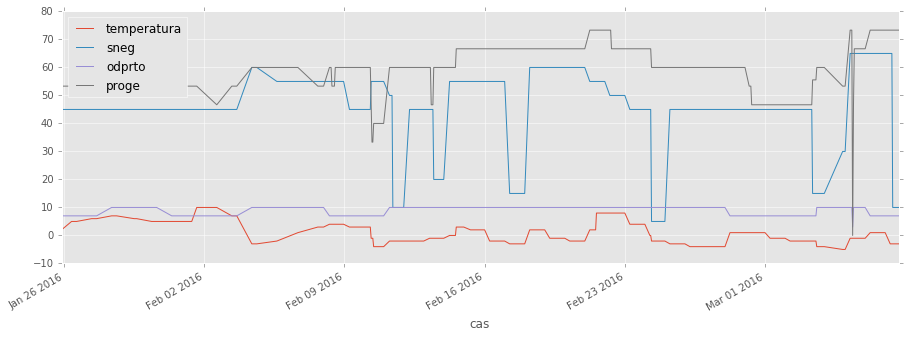

In [764]:
MariborskoPohorje[['temperatura','sneg','odprto','proge']].plot().legend(loc=2,ncol=1)

primer ene ure:

In [765]:
MariborskoPohorje.iloc[9]

smucisce                                       MariborskoPohorje
datum                                                 2016-01-29
vreme                                                     sončno
temperatura                                                    6
sneg                                                          45
obratovanje              {('9.00', '16.00'), ('18.00', '21.00')}
odprto                                                        10
sedeznice      {'vlečnica': '4/9', 'gondola': '1/1', 'sedezni...
proge                                                      53.33
Name: 2016-01-29 12:00:00, dtype: object

### 1.2.1. povprečne vrednosti po dnevih

In [766]:
MariborskoPohorje.groupby('datum').mean().head()

,temperatura,sneg,odprto,proge
datum,,,,
2016-01-25,2,45,7,53.33
2016-01-26,5,45,7,53.33
2016-01-27,6,45,7,53.33
2016-01-28,7,45,10,53.33
2016-01-29,6,45,10,53.33


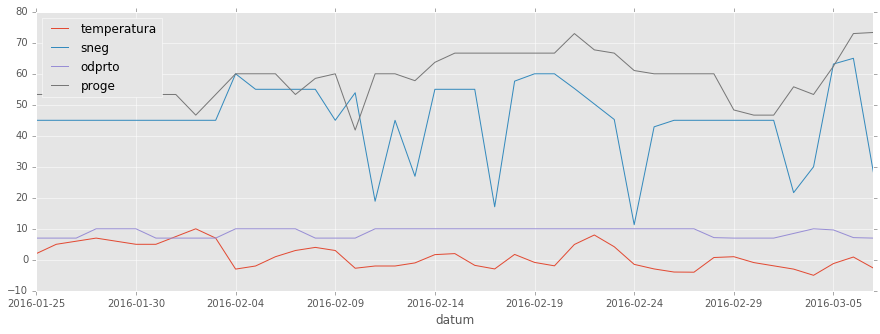

In [767]:
MariborskoPohorje.groupby('datum').mean().plot().legend(loc=2,ncol=1)

V tem primeru že lahko sklepamo na manjšo povezavo med temperaturo in odprtimi progami (mogoče tudi s količino snega)

### 1.2.2. tempretatura

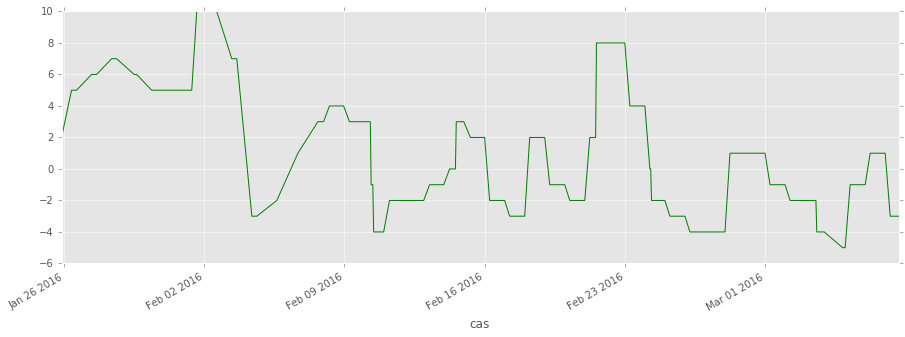

In [768]:
MariborskoPohorje['temperatura'].plot(color='green')

Minimalna in maksimalna temperatura v opazovalnem obdobju:

In [769]:
MariborskoPohorje['temperatura'].min()

-5

In [770]:
MariborskoPohorje['temperatura'].max()

10

### 1.2.3. količina snega (v cm)

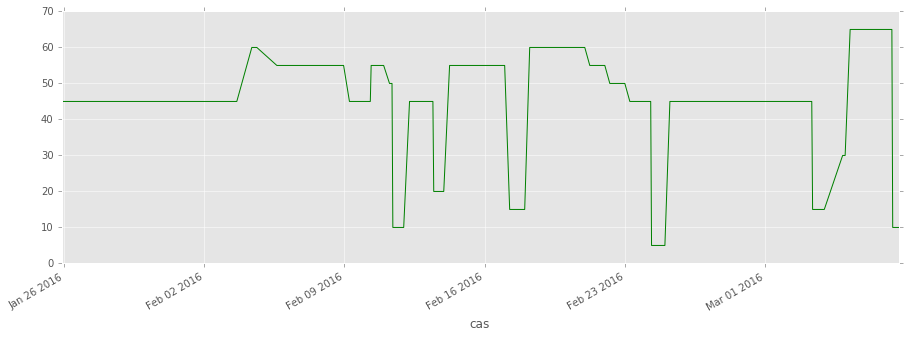

In [771]:
MariborskoPohorje['sneg'].plot(color='green')

In [772]:
MariborskoPohorje['sneg'].min()

5

In [773]:
MariborskoPohorje['sneg'].max()

65

### 1.2.4. obratovalni čas smučišča v urah 

In [774]:
MariborskoPohorje['odprto'].max()

10.0

In [775]:
MariborskoPohorje['odprto'].min()

3.0

### 1.2.5. število odprtih prog (v procentih)

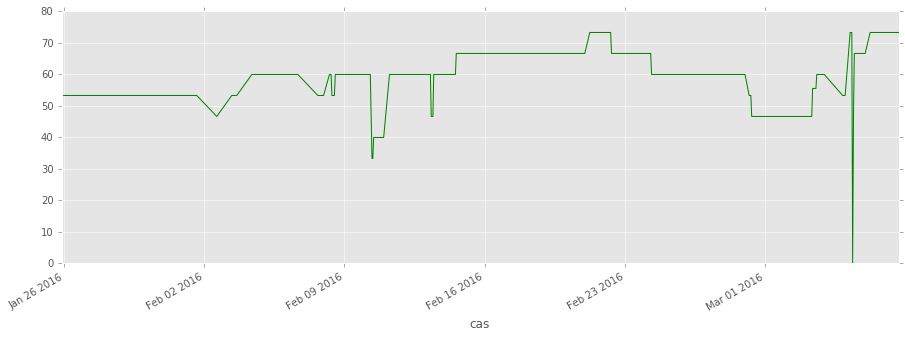

In [776]:
MariborskoPohorje['proge'].plot(color='green')

In [777]:
MariborskoPohorje['proge'].min()

0.0

In [778]:
MariborskoPohorje['proge'].max()

73.329999999999998

### 1.2.6. Vreme

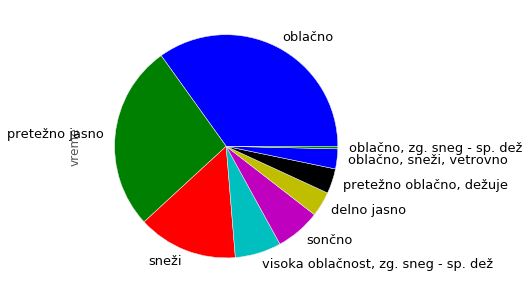

In [779]:
Mariborsko_Pohorje['vreme'].value_counts().head(16).plot(kind='pie', figsize=(5, 5), fontsize=13)

Podobno analizo bi lahko naredili tudi za ostala smučišča, vendar zaradi bolše preglednosti to izpustimo.

# 2. Primerjava med smučišči 

V ta namen smo pripravili datoteko Skupna.csv

In [780]:
Skupna.head()

,smucisce,datum,vreme,temperatura,sneg,obratovanje,odprto,sedeznice,proge
cas,,,,,,,,,
2016-01-25 21:00:00,RTC_Krvavec,2016-01-25,pretežno jasno,5,50,"{('8.00', '16.00')}",8,"{'gondola': '1/1', 'vlečnica': '3/5', 'sedezni...",84.62
2016-01-25 21:00:00,Mariborsko_Pohorje,2016-01-25,pretežno jasno,2,45,"{('9.00', '16.00')}",7,"{'gondola': '1/1', 'vlečnica': '4/9', 'sedezni...",53.33
2016-01-25 21:00:00,Rogla,2016-01-25,pretežno oblačno,3,60,"{('9.00', '16.00')}",7,"{'vlečnica': '9/10', 'sedeznica': '2/2'}",91.67
2016-01-25 21:00:00,RTCKranjskaGora,2016-01-25,sončno,-3,45,"{('9.00', '16.00')}",7,"{'vlečnica': '8/13', 'sedeznica': '4/5'}",66.67
2016-01-25 21:00:00,SC_Cerkno,2016-01-25,pretežno jasno,2,60,"{('9.00', '16.00')}",7,"{'vlečnica': '2/2', 'sedeznica': '4/5'}",85.71


## 2.1. Povprečne vrednosti

Povprečne vrednosti temperature, količine snega, obratovalnega časa (odprto), procenta odprtih prog (proge)

In [781]:
PoSmuciscih=Skupna.groupby('smucisce').mean()

In [782]:
PoSmuciscih

,temperatura,sneg,odprto,proge
smucisce,,,,
Bukovnik,0.348387,31.338710,6.270968,85.483871
Celjska_koča,2.254335,21.271676,4.227360,28.581676
GTC_Kope,-0.201077,48.001795,9.122083,84.021580
Javornik,-0.388186,18.797468,4.278481,26.371308
Macesnov_Rateče,-0.352542,32.847458,5.010169,50.171356
Mariborsko_Pohorje,0.097649,45.316456,8.994575,60.671989
Poseka,1.072210,26.610503,1.562363,17.943107
RTCKranjskaGora,1.666667,45.000000,9.500000,65.835000
RTC_Golte,-0.608059,72.060440,7.000000,91.102692


### 2.1.1. Temperatura

Zanimalo nas je tudi katero smučišče je povprečno 'najbolj mrzlo' in katero 'najbolj toplo'.

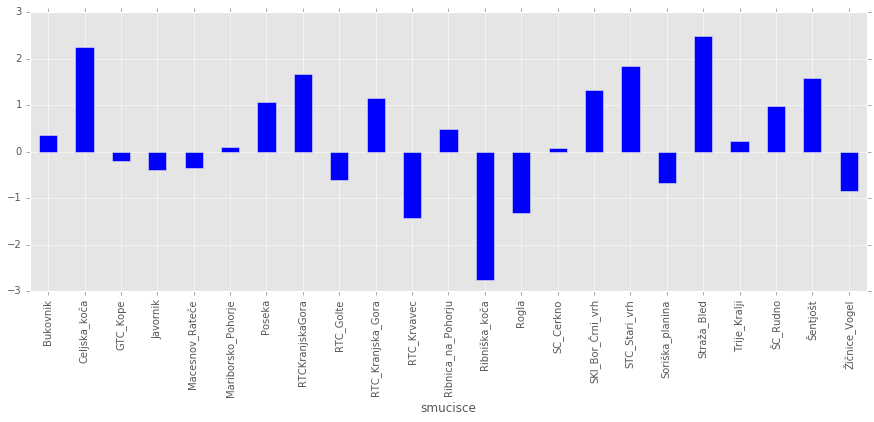

In [783]:
PoSmuciscih['temperatura'].plot(kind='bar')

Opazimo, da iz povprečja zelo izstopa Ribniška Koča, ki je torej imelo najnižjo povprečno temperaturo.
Najvišjo povprečno temperaturo pa je imelo smučišče Straža Bled.

Analizirai bomo tudi kakšna je temperaturna razlika med posameznimi smučišči.
Najprej si poglejmo temperaturno razliko med Roglo in Mariborskim Pohorjem. Razberemo lahko, da se temperature v merjenem času niso preveč razlikovale. Podobnos nas ne preseneča, saj sta omenjeni smučišči razmeroma blizu.

In [784]:
Primerjava=pd.merge(MariborskoPohorje.reset_index(), Rogla.reset_index(),on=['cas','datum'],suffixes=('_Mariborsko Pohorje','_Rogla'))

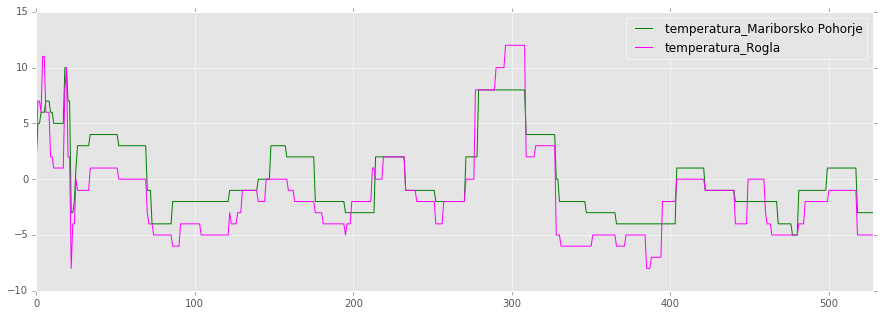

In [785]:
Primerjava[['cas','temperatura_Mariborsko Pohorje','temperatura_Rogla']].plot(color=['green','magenta']).legend(loc=1, ncol=1)

Temperaturno razliko pa že opazimo med smučiščema Mariborsko Pohorje in RTC Kranjska Gora, ki ležina na povsem drugih koncih Slovenije.

In [786]:
Primerjava1=pd.merge(MariborskoPohorje.reset_index(), RTCKranjskaGora.reset_index(),on=['cas','datum'],suffixes=('_Mariborsko Pohorje','_RTC Kranjska Gora'))

In [787]:
Primerjava_Skupaj=pd.merge(Primerjava, Primerjava1)

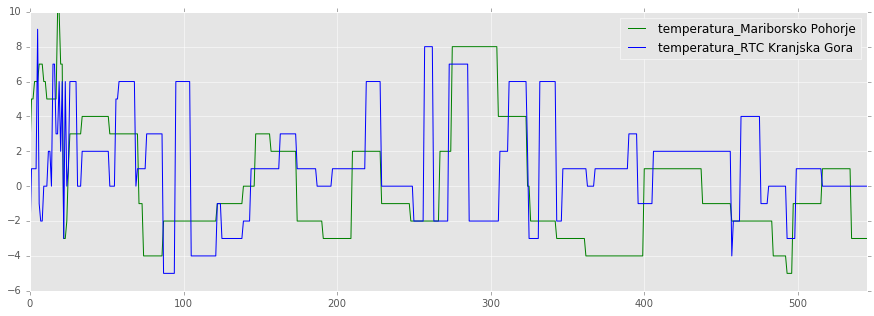

In [788]:
Primerjava1[['cas','temperatura_Mariborsko Pohorje','temperatura_RTC Kranjska Gora']].plot(color=['green','blue']).legend(loc=1, ncol=1)

### 2.1.2. Količina snega

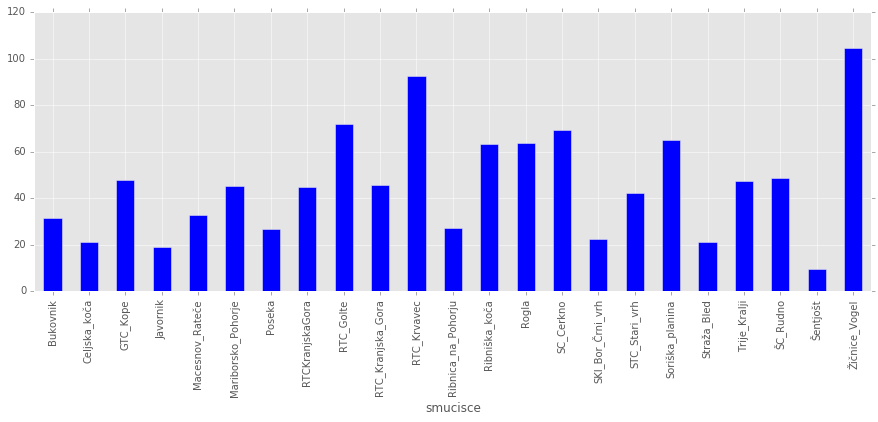

In [789]:
PoSmuciscih['sneg'].plot(kind='bar')

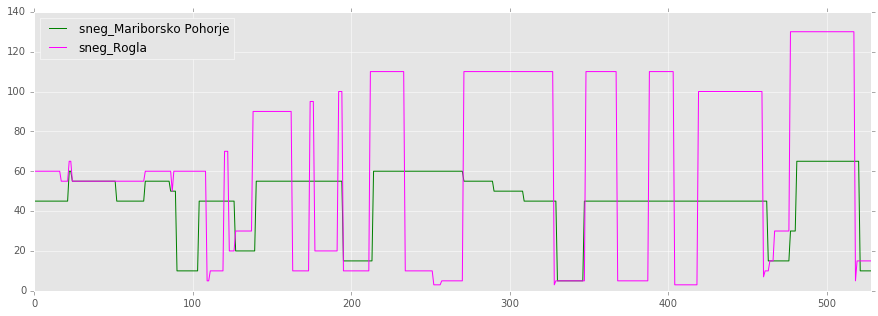

In [790]:
Primerjava[['cas','sneg_Mariborsko Pohorje','sneg_Rogla']].plot(color=['green','magenta']).legend(loc=2, ncol=1)

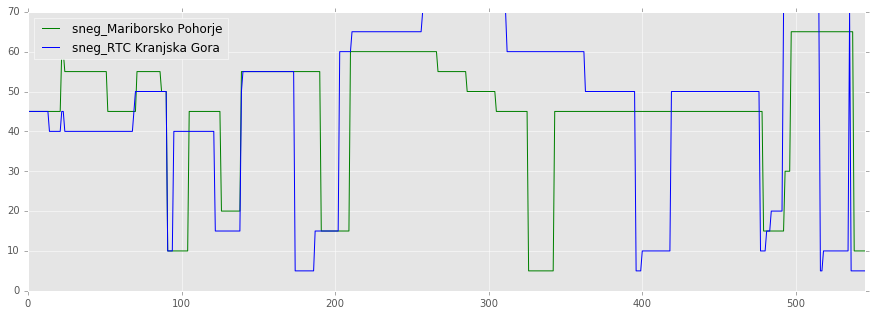

In [791]:
Primerjava1[['cas','sneg_Mariborsko Pohorje','sneg_RTC Kranjska Gora']].plot(color=['green','blue']).legend(loc=2, ncol=1)

Pri količini snega pa ne moremo sklepati tako kot pri temperaturi. Količina snega se namreč bolj ujema pri smučiščih Mariborko Pohorje ter Kranjska Gora kot na smučiščih Mariborko Pohorje in Rogla. To najverjetneje lahko pripišemo nadmorski višini smučišča (smučišče Kranjska Gora leži na nadmorski višini 800 m, Mariborsko Pohorje na 764 m, Rogla pa na višini 1.500 m kar je precej več kot pri ostalih dveh). Ni pa količina snega toliko odvisna od oddaljenosti smučišč, kar pomeni, da po Sloveniji sneži ob istih 'dnevih'.

Če to prikažemo na istem grafu:

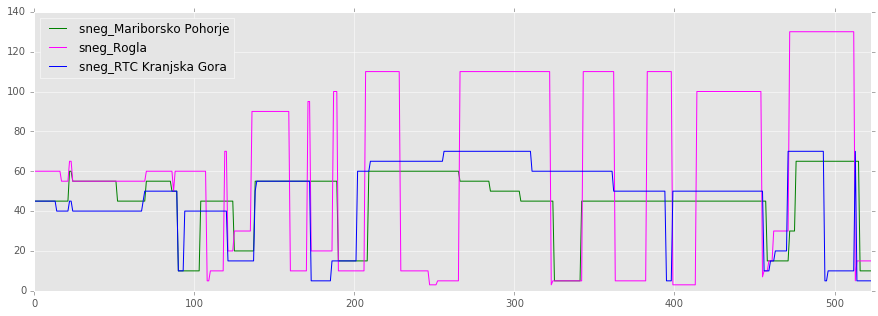

In [792]:
Primerjava_Skupaj[['cas','sneg_Mariborsko Pohorje','sneg_Rogla','sneg_RTC Kranjska Gora']].plot(color=['green','magenta','blue'])

### 2.1.3 Obratovalni čas in število odprtih prog v procentih / 10

In [793]:
PoSmuciscih1['Proge']=PoSmuciscih['proge']/10

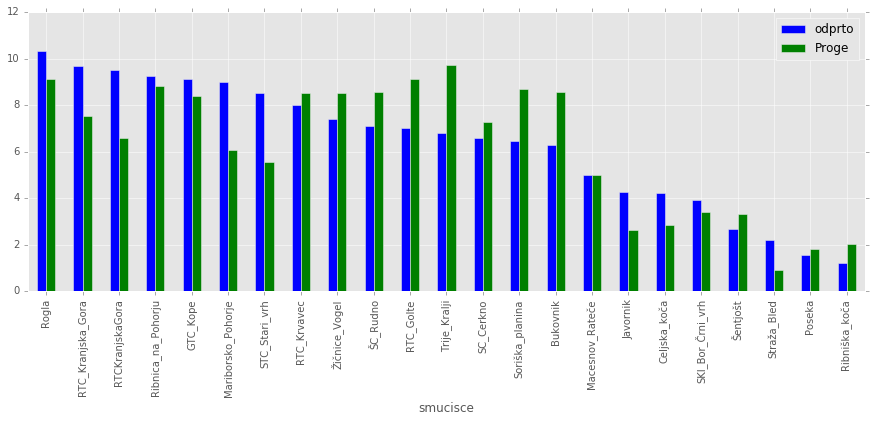

In [794]:
PoSmuciscih1[['odprto','Proge']].sort_values(by='odprto',ascending=False).plot(kind='bar')

Opazimo lahko, da sta obratovalni čas in število odprtih prog 'malo' povezana (ko pada število ur obratovalnega časa, načeloma pada tudi število odprtih prog).
Napaka, ki se pojavi, je prisotna večinoma zaradi majnega števila vseh prog in posledično hitrega spreminjanja tega števila ob že zelo majhni spremembi (odprtje ene proge).
Napaka se pojavi tudi pri smučišči z zelo malim številom skupnih prog (običajno manjša smučišča kot so smučišče Trije Kralji, smučišče Bukovnik in smučišče Soriška planina).

### 2.1.3. Vreme

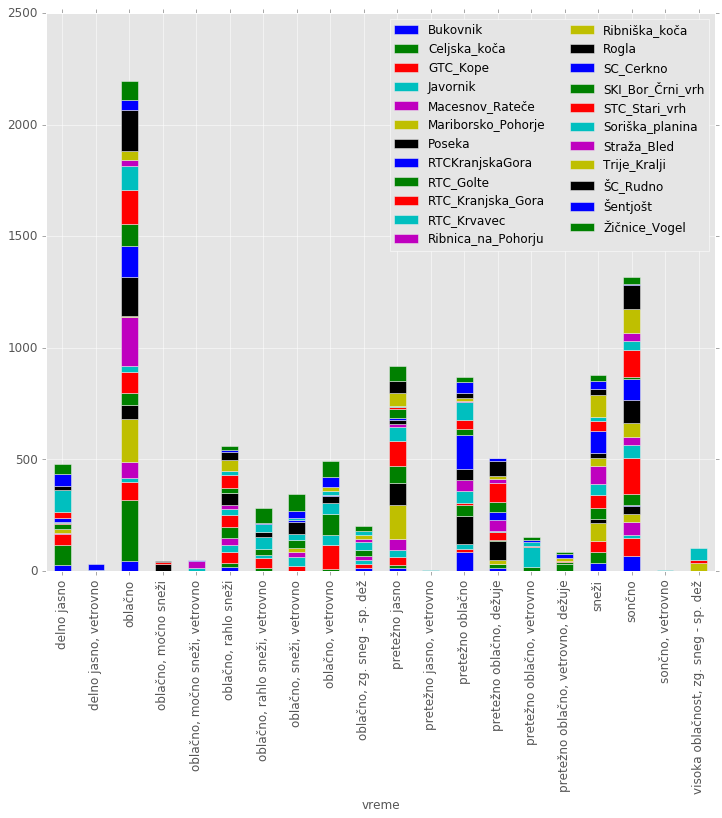

In [795]:
graf = Skupna.groupby(['vreme', 'smucisce']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 10), fontsize=12)
graf.legend(loc=0, ncol=2)

## 2.2. Minimalne in Maksimalne vrednosti
### Koliko in kje
### 2.2.1. Temperatura

Kje je bila dosežena najnižje temperatura v tem obdobju? Koliko je bilo pri tej temperaturi snega in kakšno je bilo vreme?  

In [796]:
najnižja=Skupna['temperatura'].min()
najnižja

-8

Seznam vseh krajev (opremljen z datumom in uro), kjer je bila v tem obdobju dosežena najnižja temperatura:

In [797]:
Skupna[Skupna.temperatura==najnižja].smucisce

cas
2016-02-04 09:00:00    Rogla
2016-02-27 06:00:00    Rogla
2016-02-27 07:00:00    Rogla
2016-02-27 08:00:00    Rogla
Name: smucisce, dtype: object

Seznam vseh vremenskih razmer (opremljen z datumom in uro), v katerih je bila dosežena najnižja temperatura:

In [798]:
Skupna[Skupna.temperatura==najnižja].vreme

cas
2016-02-04 09:00:00     sončno
2016-02-27 06:00:00    oblačno
2016-02-27 07:00:00    oblačno
2016-02-27 08:00:00    oblačno
Name: vreme, dtype: object

In [799]:
najvišja=Skupna['temperatura'].max()
najvišja

14

Seznam vseh krajev (opremljen z datumom in uro), kjer je bila v tem obdobju dosežena najnižja temperatura:

In [800]:
Skupna[Skupna.temperatura==najvišja].smucisce

cas
2016-01-26 09:00:00    Žičnice_Vogel
2016-01-26 15:00:00    Žičnice_Vogel
Name: smucisce, dtype: object

Seznam vseh vremenskih razmer (opremljen z datumom in uro), v katerih je bila dosežena najnižja temperatura:

In [801]:
Skupna[Skupna.temperatura==najvišja].vreme

cas
2016-01-26 09:00:00         sončno
2016-01-26 15:00:00    delno jasno
Name: vreme, dtype: object

### 2.2.2. Količina snega

In [802]:
Skupna['sneg'].min()

0

In [803]:
Skupna['sneg'].max()

330

# 3. Ostale analize

Povprečne vrednosti temoerature, količine snega, obratovalnega časa in števila odprtih prog ob pasameznih vremenskih razmerah.

In [804]:
Povprecje=Skupna.groupby('vreme').mean()
Minimum=Skupna.groupby('vreme').min()[['temperatura','sneg','odprto','proge']]
Maksimum=Skupna.groupby('vreme').max()[['temperatura','sneg','odprto','proge']]
Povprecje

,temperatura,sneg,odprto,proge
vreme,,,,
delno jasno,0.750520,59.261954,6.844075,76.762162
"delno jasno, vetrovno",4.000000,16.545455,5.121212,74.242424
oblačno,0.674567,44.944850,7.175251,66.271955
"oblačno, močno sneži",0.800000,14.022222,2.488889,25.111111
"oblačno, močno sneži, vetrovno",-0.875000,18.854167,0.156250,1.851875
"oblačno, rahlo sneži",-1.016071,37.932143,7.919643,74.352232
"oblačno, rahlo sneži, vetrovno",-1.275618,60.653710,7.448763,83.927597
"oblačno, sneži, vetrovno",-1.636628,75.296512,6.184593,67.305669
"oblačno, vetrovno",0.006085,62.519270,8.067951,78.612901


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13d74dc18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13e813ba8>], dtype=object)

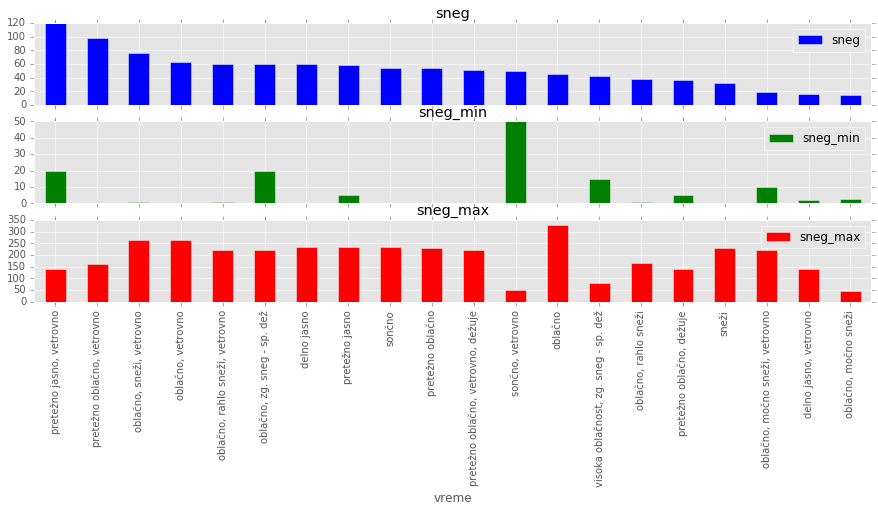

In [805]:
Mininmax=pd.merge(Minimum.reset_index(), Maksimum.reset_index(), on='vreme',suffixes=('_min','_max'))
MMP=pd.merge(Mininmax, Povprecje.reset_index(), on='vreme')
MMP.set_index('vreme')[['sneg','sneg_min','sneg_max']].sort_values(by='sneg',ascending=False).plot(kind='bar',subplots=True)

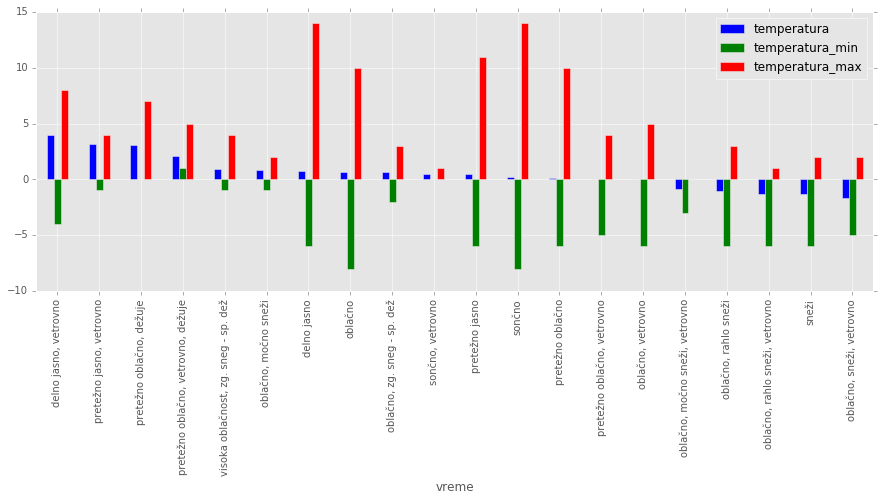

In [806]:
MMP.set_index('vreme')[['temperatura','temperatura_min','temperatura_max']].sort_values(by='temperatura',ascending=False).plot(kind='bar')

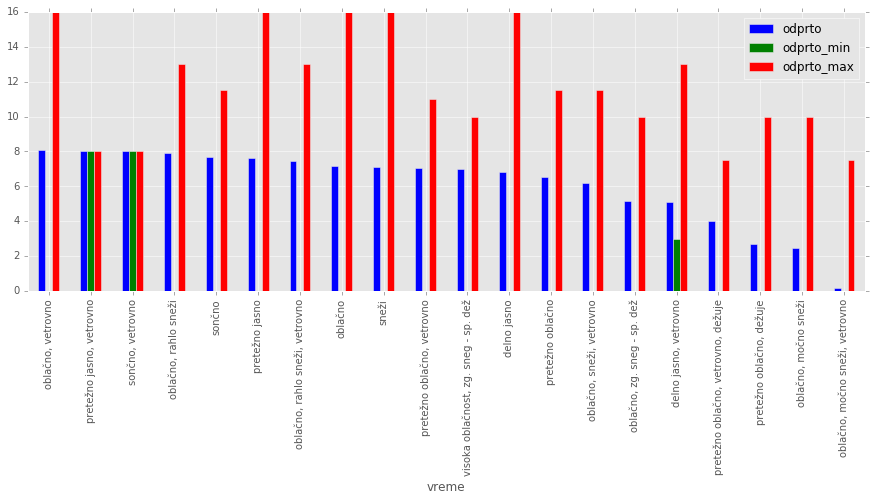

In [807]:
MMP.set_index('vreme')[['odprto','odprto_min','odprto_max']].sort_values(by='odprto',ascending=False).plot(kind='bar')

Zanima nas tudi kakšno je povprečno vreme na smučiščih po Sloveniji

In [808]:
Skupna['vreme'].value_counts()

oblačno                                 2194
sončno                                  1318
pretežno jasno                           920
sneži                                    878
pretežno oblačno                         867
oblačno, rahlo sneži                     560
pretežno oblačno, dežuje                 506
oblačno, vetrovno                        493
delno jasno                              481
oblačno, sneži, vetrovno                 344
oblačno, rahlo sneži, vetrovno           283
oblačno, zg. sneg - sp. dež              200
pretežno oblačno, vetrovno               150
visoka oblačnost, zg. sneg - sp. dež     103
pretežno oblačno, vetrovno, dežuje        83
oblačno, močno sneži, vetrovno            48
oblačno, močno sneži                      45
delno jasno, vetrovno                     33
pretežno jasno, vetrovno                   6
sončno, vetrovno                           2
Name: vreme, dtype: int64

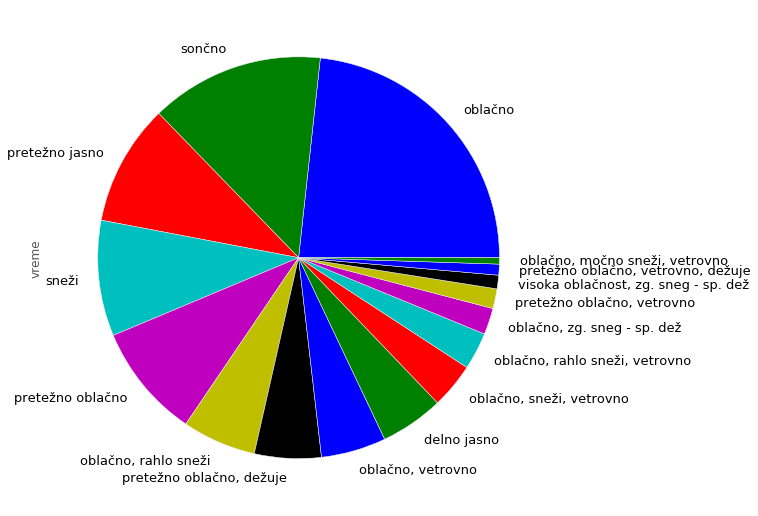

In [809]:
Skupna['vreme'].value_counts().head(16).plot(kind='pie', figsize=(9, 9), fontsize=13)

Vidimo, da na slovenskih smučiščih prevlada oblačno vreme.

Vreme lahko tudi razdelimo v dve skupini:    
☀️'lepo vreme' ali raje 'jasno'  
☁️'slabo vreme' ali raje 'oblačno'  

V ta namen si definiramo funkcijo vreme().

In [840]:
def vreme(ime):
    if ime=='delno jasno': #,'delno jasno, vetrovno','pretežno jasno','sončno','sončno, vetrovno']:
        return 'lepo vreme'
    else:
        return 'slabo vreme'

In [735]:
koliko=Skupna.groupby('vreme').count()[['smucisce']]

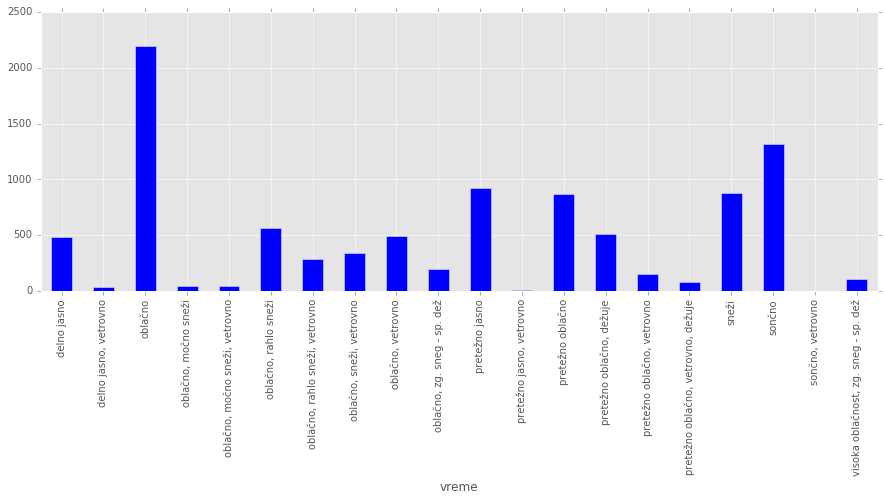

In [738]:
Vreme1=Povprecje.join(koliko)['smucisce']
Vreme1.plot(kind='bar')

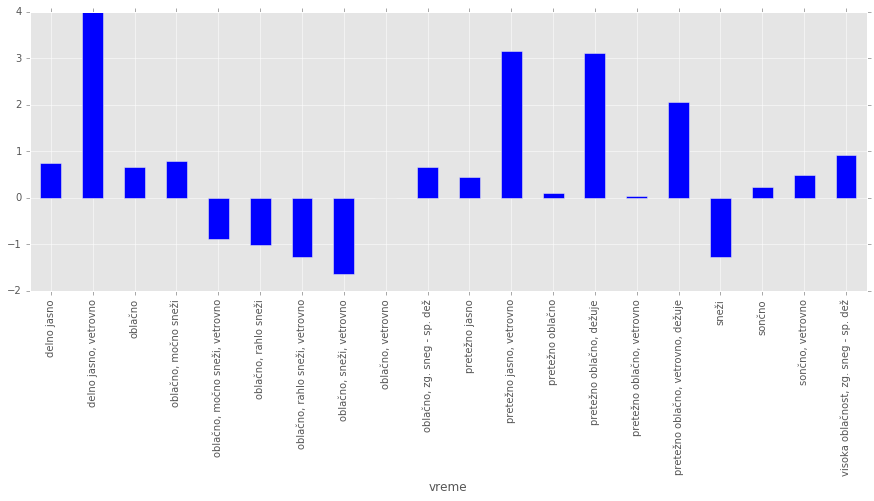

In [739]:
Povprecje['temperatura'].plot(kind='bar')

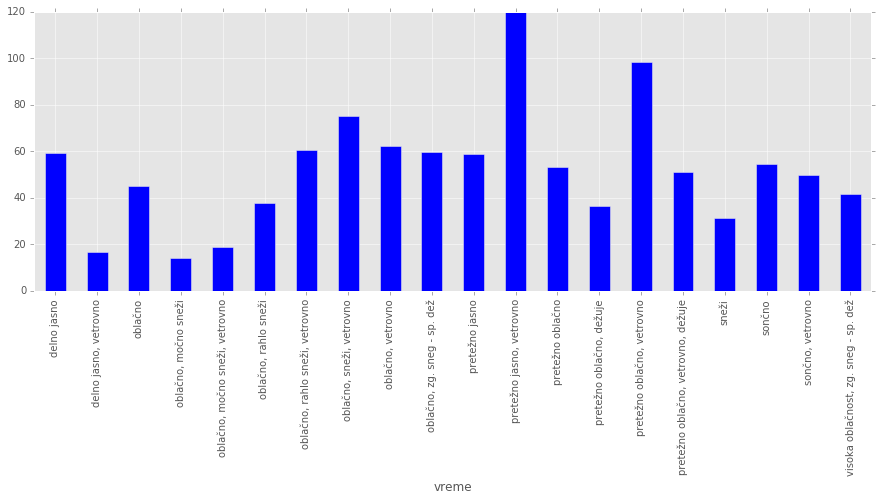

In [740]:
Povprecje['sneg'].plot(kind='bar')

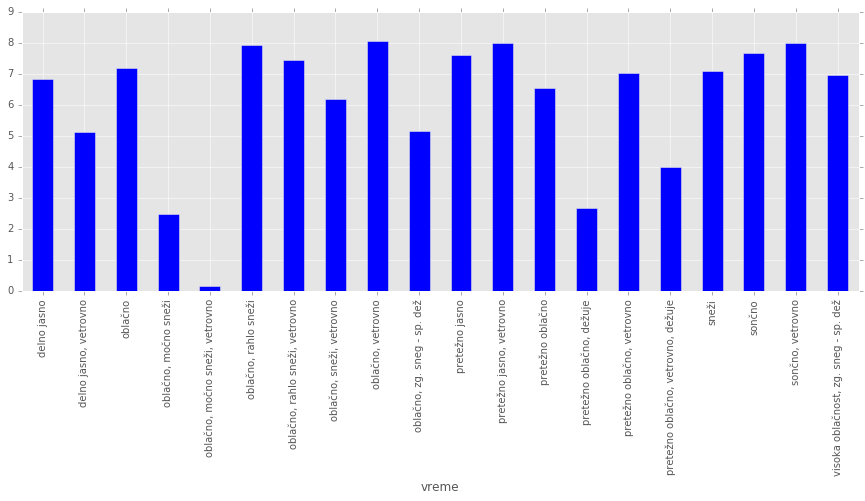

In [741]:
Povprecje['odprto'].plot(kind='bar')